## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Loading the Data

In [2]:
wine_data= pd.read_csv('winequality-red.csv')

In [3]:
# check the first 5 rows of the data.
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
 # check no of rows and columns.
wine_data.shape

(1599, 12)

In [5]:
#checking for any missing values.
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [6]:
# statistical measures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


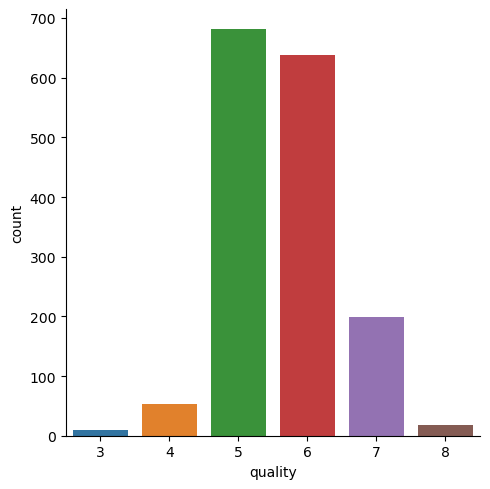

In [7]:
# number of values for each quality
sns.catplot(x='quality',data=wine_data,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

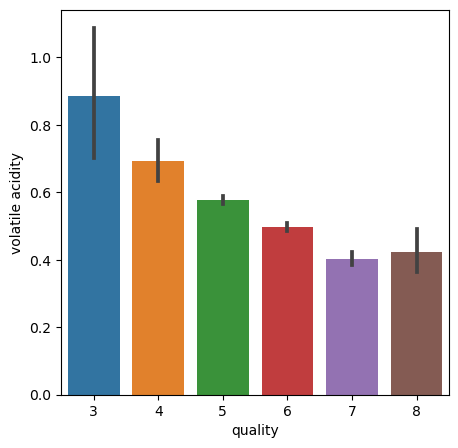

In [8]:
# volatile acidity VS Quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

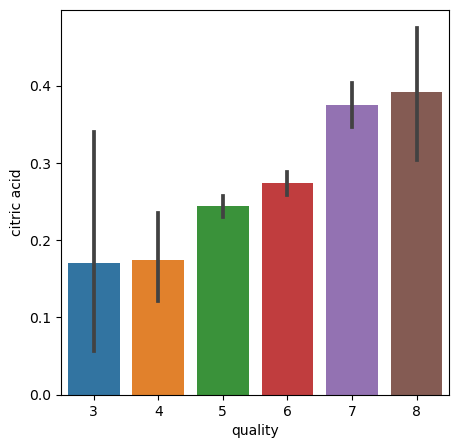

In [9]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'citric acid',data= wine_data)

<Axes: xlabel='quality', ylabel='residual sugar'>

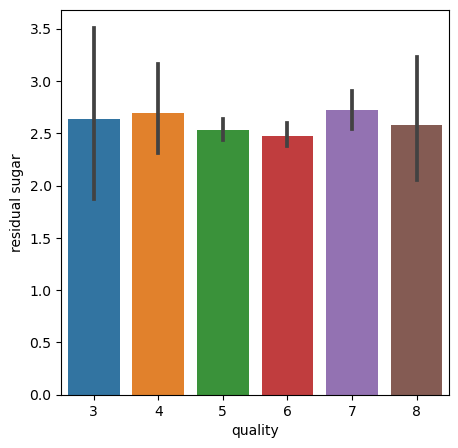

In [10]:
#residual sugar vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'residual sugar',data= wine_data)

<Axes: xlabel='quality', ylabel='chlorides'>

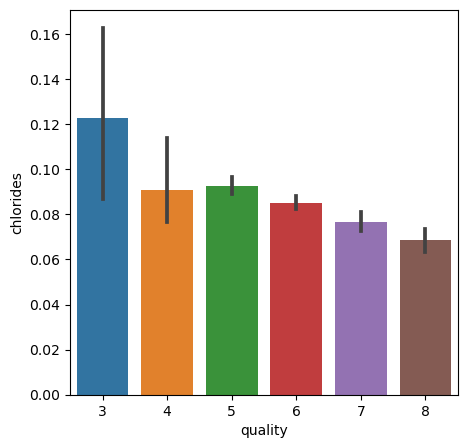

In [11]:
#chlorides vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'chlorides',data= wine_data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

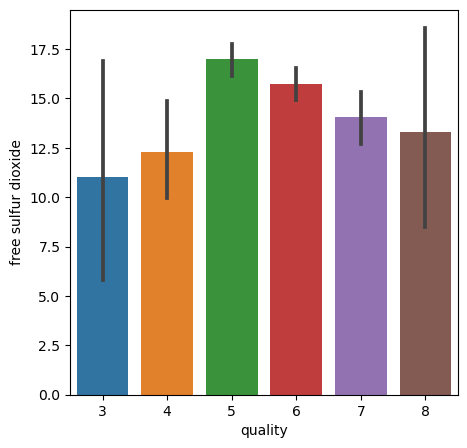

In [12]:
# free sulfur dioxide vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'free sulfur dioxide',data= wine_data)

## Correlation

In [13]:
correlation= wine_data.corr()

<Axes: >

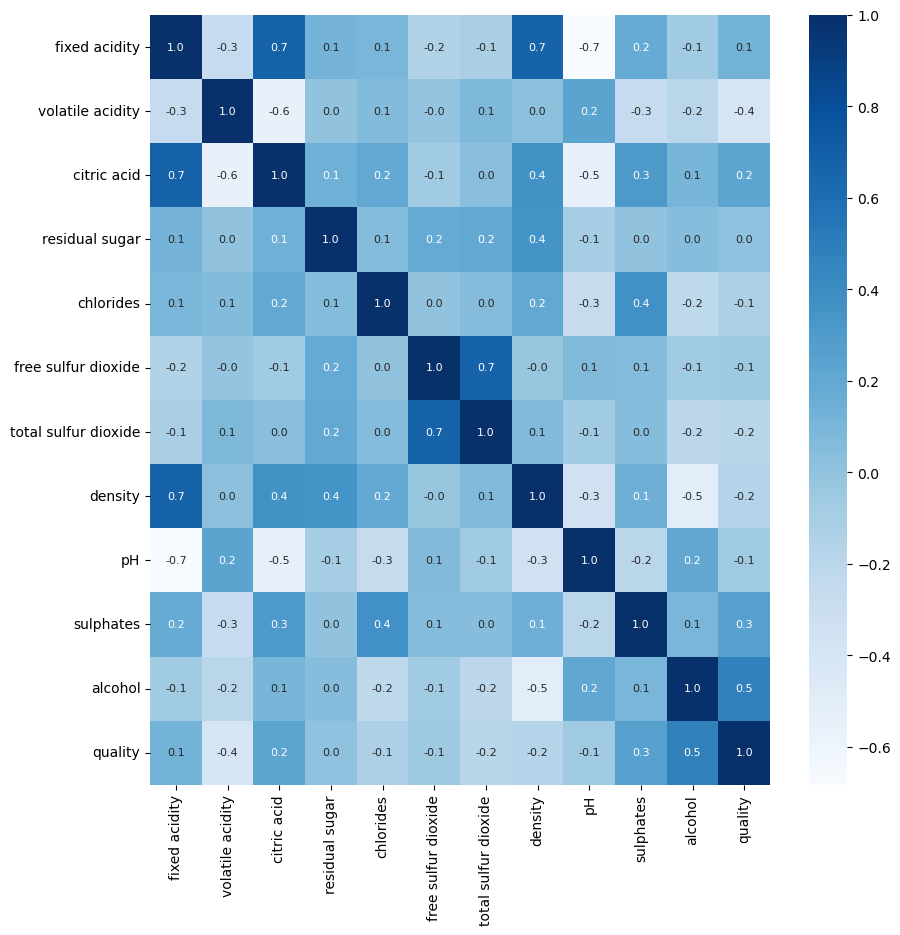

In [14]:
# constructing a heatmap to find out the correlation between the variables.

plot= plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='Blues',fmt='.1f',annot_kws={'size':8})

## Data Preprocessing

In [15]:
X= wine_data.drop('quality',axis=1)

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Label Binarization

In [17]:
Y= wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [18]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

## Train, Test & Split

In [19]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=3)

In [20]:
Y.shape,Y_train.shape,Y_test.shape

((1599,), (1279,), (320,))

## Model Training:
### Random Forest Classifier

In [21]:
model= RandomForestClassifier()

In [22]:
model.fit(X_train,Y_train)

RandomForestClassifier()

## Model Evaluation

In [23]:
# accuracy score
x_test_pred= model.predict(X_test)
data_accuracy= accuracy_score(x_test_pred,Y_test)

In [24]:
print('Accuracy:',data_accuracy)

Accuracy: 0.921875


## Building a Predictive Model

In [28]:
input_data= (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the data into numpy array.

input_data_np= np.asarray(input_data)

#reshape the data as we are predicting for only one instance.

reshaped_data= input_data_np.reshape(1,-1)

predict= model.predict(reshaped_data)
print(predict)

if (predict[0]==1):
    print('Quality of Wine is good')
else:
    print('Quality of Wine is Bad')

[1]
Quality of Wine is good


C:\Users\Gajanan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Thats how we succesfully created the predictive system for the wine quality which will give us the quality of the wine based on the score mentioned above. The model Random Forest Regressor gave us the 92% of accuracy and turns out the most useful and reliable model to predict the quality of the wine. 